In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


sns.set_style('white')
sns.set_context('paper')
sns.set()
import random
from sklearn.manifold import TSNE
from utils.utils import find_norm_params

legend_size = 14

In [14]:
s = '5' 
models = ['results_Mechanistic','results_MechanisticGauss']
selected = models[0]
data_path = "data/challenge/s{}/{}/".format(s, selected)

shedding = np.load(data_path + 'shedding.npy')
symptoms = np.load(data_path + 'symptoms.npy')
y = np.load(data_path + 'observations.npy')
times = np.load(data_path + 'times.npy')


mu_50_post = np.load(data_path + 'mu_50_post.npy')
mu_25_post = np.load(data_path + 'mu_25_post.npy')
mu_75_post = np.load(data_path + 'mu_75_post.npy')

x_post = np.load(data_path + 'solution_xt_post.npy')
x_post = np.swapaxes(x_post,1,2)

mu_50_prior = np.load(data_path + 'mu_50_prior.npy')
mu_25_prior = np.load(data_path + 'mu_25_prior.npy')
mu_75_prior = np.load(data_path + 'mu_75_prior.npy')
x_prior = np.load(data_path + 'solution_xt_prior.npy')
x_prior = np.swapaxes(x_prior,1,2)

print("data_path: ", data_path)

data_path:  data/challenge/s5/results_Mechanistic/


In [15]:
print(shedding.shape)
print(symptoms.shape)
print(y.shape)
print(times.shape)
print(mu_75_prior.shape)
print(x_post.shape)
outcomes = np.concatenate((shedding,symptoms), axis=1)
print(outcomes.shape)

(7, 1)
(7, 1)
(7, 4, 142)
(142,)
(7, 4, 142)
(7, 5, 142)
(7, 2)


## Plot Shedding/Symptoms at all times

results_Mechanistic l1_error_av_post:  38.62029


<Figure size 640x480 with 0 Axes>

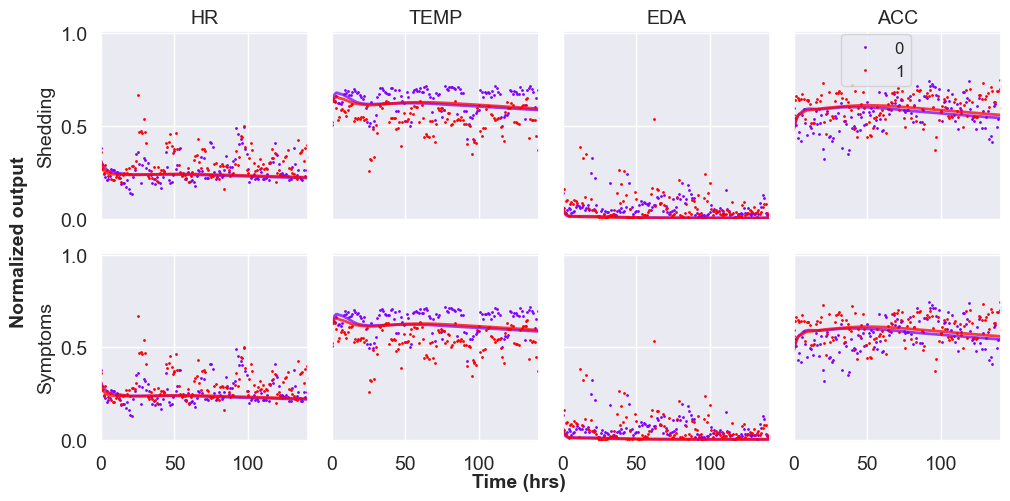

In [16]:
plt.clf()
from matplotlib import cm
fig, axs = plt.subplots(2, 4, sharex=True, sharey=True, figsize=(10, 5))
fs = 14
mu_50 = mu_50_post
mu_25 = mu_25_post
mu_75 = mu_75_post


outcome_values = [0,1]
treat_values = ['0', '1']

colors = [cm.rainbow(x) for x in np.linspace(0, 1, len(outcome_values))] 
#colors = ['purple', 'orange', 'red']
l1_error = []

for t_idx, out in enumerate(outcome_values):
    for c in range(4):
        for r, t in enumerate(range(outcomes.shape[1])):
            idx_C = outcomes[:, t] ==  out
            mu_50_av = np.mean(mu_50[idx_C], 0)
            mu_25_av = np.mean(mu_25[idx_C], 0)
            mu_75_av = np.mean(mu_75[idx_C], 0)
            y_av = np.mean(y[idx_C], 0) 
           
            l1_error.append(np.sum(np.abs(mu_50_av -y_av)))
            #print("mu_50_av: ", mu_50_av.shape)
         
            if c ==0 and r==0:
                axs[r, c].plot(times, y_av[c], '.', color=colors[t_idx],  markersize=2, alpha=1, 
                               label=treat_values[t_idx])
            else:
                 axs[r, c].plot(times, y_av[c], '.', color=colors[t_idx],  markersize=2, alpha=1)
            axs[r, c].plot(times, mu_50_av[c], '-', color=colors[t_idx],  lw=2, alpha=0.75)
            #axs[r, c].fill_between(times, mu_25_av[c], mu_75_av[c],color=colors[t_idx], alpha=0.1) 
        
            axs[r, c].set_xlim(0.0, max(times) + 0.01)
            axs[r, c].set_ylim(-0.01, 1.01)
            axs[r, c].set_xticks(np.arange(start=0, stop=len(times), step=50))
            axs[r, c].tick_params(axis='both', which='major', labelsize=fs)
        
cols = ['HR', 'TEMP', 'EDA', 'ACC']
for ax, col in zip(axs[0], cols):
    ax.set_title(col, fontsize=fs)

rows = ['Shedding', 'Symptoms']
for ax, row in zip(axs[:, 0], rows):
    ax.set_ylabel(row, fontsize=fs)

fig.text(0, 0.5, "Normalized output", ha="center", va="center", rotation=90, fontsize=fs, fontweight='bold')
fig.text(0.5, 0, "Time (hrs)", ha="center", va="bottom", fontsize=fs, fontweight='bold')
fig.legend(bbox_to_anchor=(0.9,0.93), fontsize=fs-2)
fig.tight_layout()
fig.tight_layout()


l1_error_av = np.mean(l1_error)
print(selected, "l1_error_av_post: ", l1_error_av)

results_Mechanistic l1_error_av_prior:  38.96859


<Figure size 640x480 with 0 Axes>

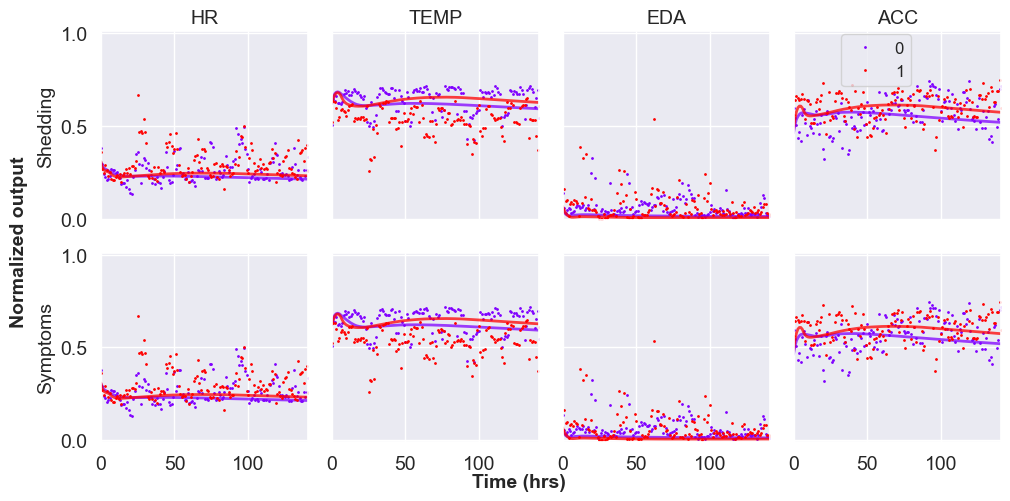

In [17]:
plt.clf()
from matplotlib import cm
fig, axs = plt.subplots(2, 4, sharex=True, sharey=True, figsize=(10, 5))
fs = 14
mu_50 = mu_50_prior
mu_25 = mu_25_prior
mu_75 = mu_75_prior


outcome_values = [0,1]
treat_values = ['0', '1']

colors = [cm.rainbow(x) for x in np.linspace(0, 1, len(outcome_values))] 
#colors = ['purple', 'orange', 'red']
l1_error = []

for t_idx, out in enumerate(outcome_values):
    for c in range(4):
        for r, t in enumerate(range(outcomes.shape[1])):
            idx_C = outcomes[:, t] ==  out
            mu_50_av = np.mean(mu_50[idx_C], 0)
            mu_25_av = np.mean(mu_25[idx_C], 0)
            mu_75_av = np.mean(mu_75[idx_C], 0)
            y_av = np.mean(y[idx_C], 0) 
           
            l1_error.append(np.sum(np.abs(mu_50_av -y_av)))
            #print("mu_50_av: ", mu_50_av.shape)
         
            if c ==0 and r==0:
                axs[r, c].plot(times, y_av[c], '.', color=colors[t_idx],  markersize=2, alpha=1, 
                               label=treat_values[t_idx])
            else:
                 axs[r, c].plot(times, y_av[c], '.', color=colors[t_idx],  markersize=2, alpha=1)
            axs[r, c].plot(times, mu_50_av[c], '-', color=colors[t_idx],  lw=2, alpha=0.75)
            #axs[r, c].fill_between(times, mu_25_av[c], mu_75_av[c],color=colors[t_idx], alpha=0.1) 
        
            axs[r, c].set_xlim(0.0, max(times) + 0.01)
            axs[r, c].set_ylim(-0.01, 1.01)
            axs[r, c].set_xticks(np.arange(start=0, stop=len(times), step=50))
            axs[r, c].tick_params(axis='both', which='major', labelsize=fs)
        
cols = ['HR', 'TEMP', 'EDA', 'ACC']
for ax, col in zip(axs[0], cols):
    ax.set_title(col, fontsize=fs)

rows = ['Shedding', 'Symptoms']
for ax, row in zip(axs[:, 0], rows):
    ax.set_ylabel(row, fontsize=fs)

fig.text(0, 0.5, "Normalized output", ha="center", va="center", rotation=90, fontsize=fs, fontweight='bold')
fig.text(0.5, 0, "Time (hrs)", ha="center", va="bottom", fontsize=fs, fontweight='bold')
fig.legend(bbox_to_anchor=(0.9,0.93), fontsize=fs-2)
fig.tight_layout()
fig.tight_layout()


l1_error_av = np.mean(l1_error)
print(selected, "l1_error_av_prior: ", l1_error_av)